BISMILLAH

6G7V0015 Machine Learning Concepts - SAAD YAQUB - 22534935

# 1- Data Understanding and Exploration


In [1]:
# Importing all the relevant libraries
from sklearn.preprocessing import StandardScaler #this will be used in scaling the features
from imblearn.over_sampling import RandomOverSampler

from pandas_profiling import ProfileReport

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize': (15,8)}, style='ticks', context='talk', font_scale=0.8)

In [2]:
# Importing the data 
df=pd.read_csv('https://raw.githubusercontent.com/saadyaqub/Coursework/main/adverts.csv')

## 1.1 Meaning and Type of Features



In [3]:
# The table below reports a summary statistics of numerical variables. 
df.describe().round(2)

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.00,368694.00,402005.00
mean,2.020071e+14,37743.60,2015.01,17341.97
std,1.691662e+10,34831.72,7.96,46437.46
min,2.013072e+14,0.00,999.00,120.00
25%,2.020090e+14,10481.00,2013.00,7495.00
50%,2.020093e+14,28629.50,2016.00,12600.00
75%,2.020102e+14,56875.75,2018.00,20000.00
max,2.020110e+14,999999.00,2020.00,9999999.00


In [4]:
#summary statistics on categorical vairables
df.describe(exclude=['int','float'])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
count,370148,396627,402005,402005,402005,401168,402005,401404
unique,72,22,110,1168,2,16,2,9
top,17,Black,BMW,Golf,USED,Hatchback,False,Petrol
freq,36738,86287,37376,11583,370756,167315,400210,216929


The codes above give a general sense of the range and ceneterality before processing the data for Machine learning model. 
In the dataset, there are 4 numerical and 8 categorical features. The following are definitions for the features. 

**Numerical Features**
1. **Mileage**: This is a quantiative feature that tells about the miles travelled by each car. This feature can be described as a continuous variables.
2. **Price**: This column contains the price for each car in the data set. Price is also a continuous variable and it is the feature of interest in this report. 
3. **Public_Reference**: Can be described as a unique identifier for each observation. It will be dropped for the sake of simplicity
4. **year_of_reg**: This column tells about the year in which the car was registered. 


**Categorical Features**
1. **reg_code**: This feature reports on the registration codes of a vehicle. From the reg code, the year of registraton can be deduced.
2. **standard_colour**: This feature reports on the color of the car. This is a nominal variable 
3. **standar_make**: Standard make contains the Brand name for each observation
4. **standard_model**: Model of the car is reported by this column
5. **vehicle_condition**: This columns tells us if the car is New or Used
6. **Body_type**: describes the body type of the car
7. **crossover_car_and_van**: If the car is a crossover car and van or not
8. **fuel_type**: The type of fuel on which a car runs on


Some feautres will be dropped in the preporcessing section of this report.


### Mileage

Mileage tells how much distance the car has been driven in Miles. Mileage is argued to be an essential factor that determines the price of the car. This is due to the fact that cars suffers wear and tear in their engines as more distance is traveled. Resulting in lowered efficieny and power. 

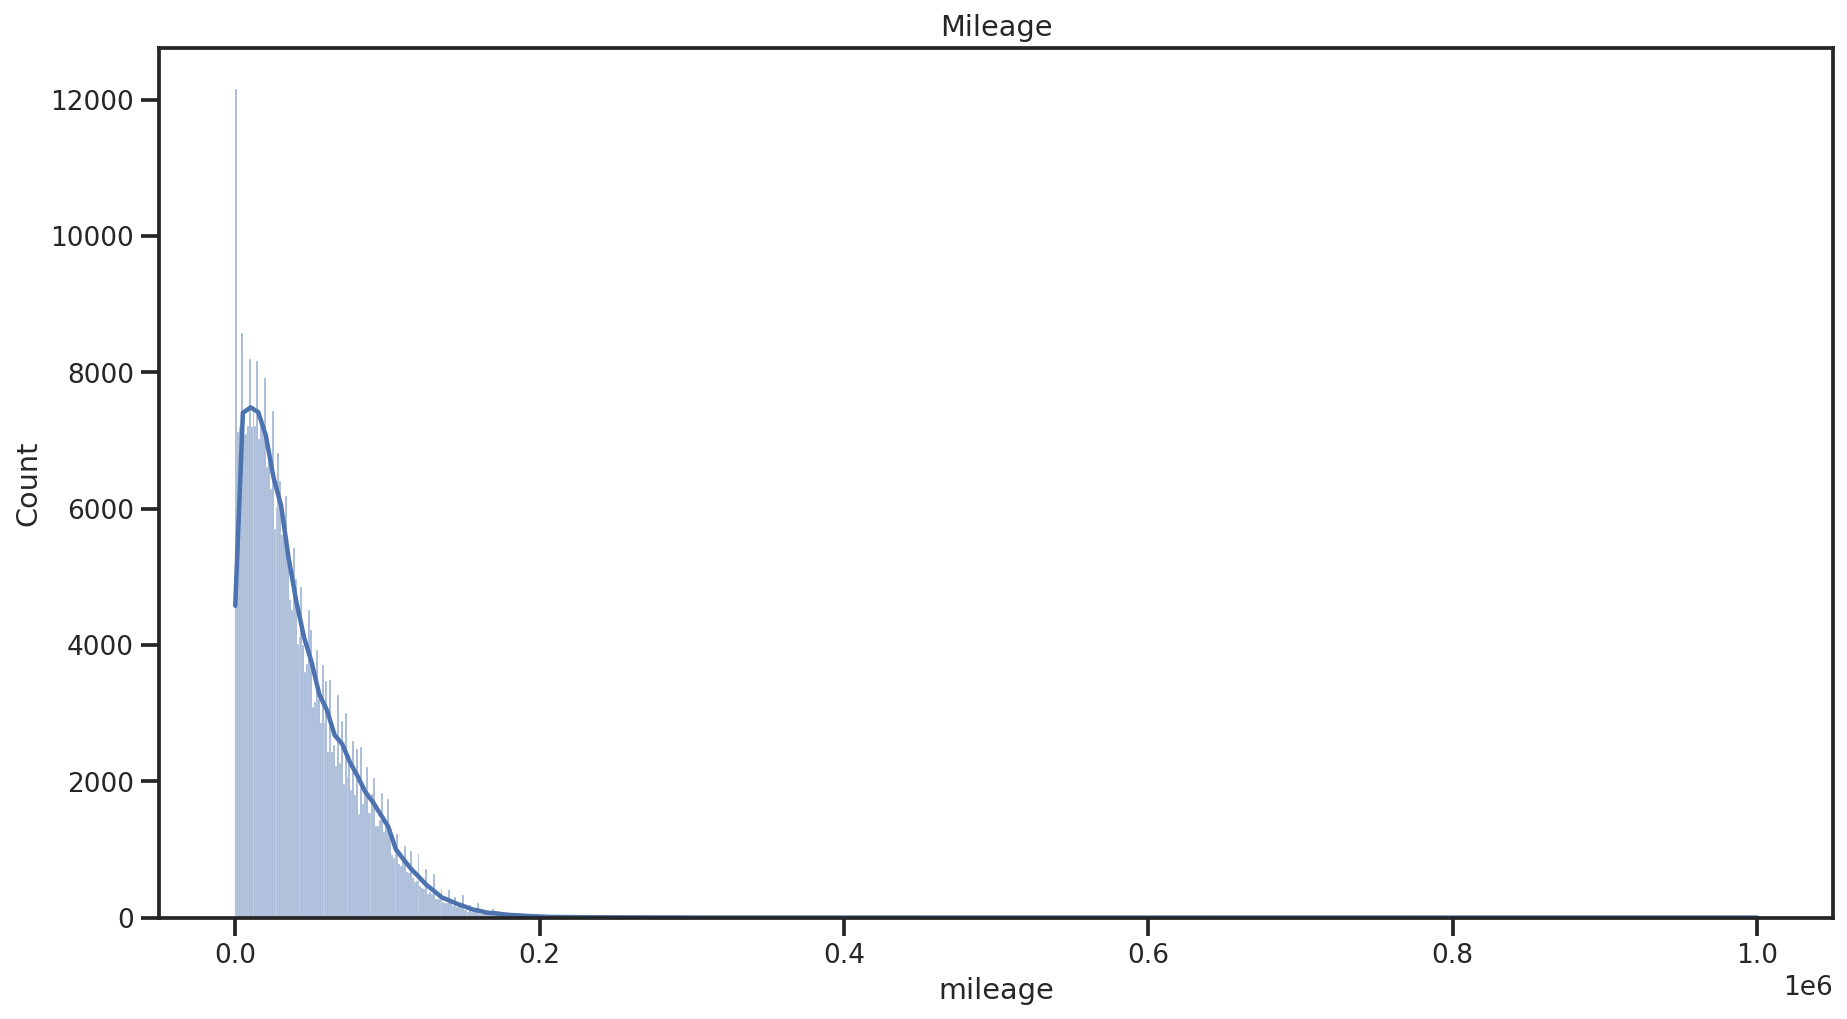

In [5]:
#plotting a histogram to visualise the distribuation of the mileage column
sns.histplot(x=df.loc[df['mileage']>10,'mileage'],data=df,kde=True).set(title='Mileage')
plt.show()

The Plot above shows the distribution of the mileage data. It can be seen that the data dsitribution has a postive skew. This means that most of the data is concentrated towards the lower Mileage figures. Moreover, the mean is greater than the median due extreme values towards the upper end of mileage. 



In [6]:
# Making new variable log10_price by applying log10 to price column 
df['log10_price']=np.log10(df.price)


A new varaible log10_price is created for the purpose of visualisation

**Year of Registration**

Year of Registeration records the years in which a car was registered and is a numerical feature. This feature is relevant as cars that have older registerations are mostly likely to have lower price as compared to the registrations that are recent.

With regards to the statistics, **2016** is being reported to be the centeral most year in terms of observations. The most recent year of registration on our data set is **2020**. Furthermore, there are **84** unique years within the year of registration. These parameters may change once the missing values are imputed and outliers are dealt with.

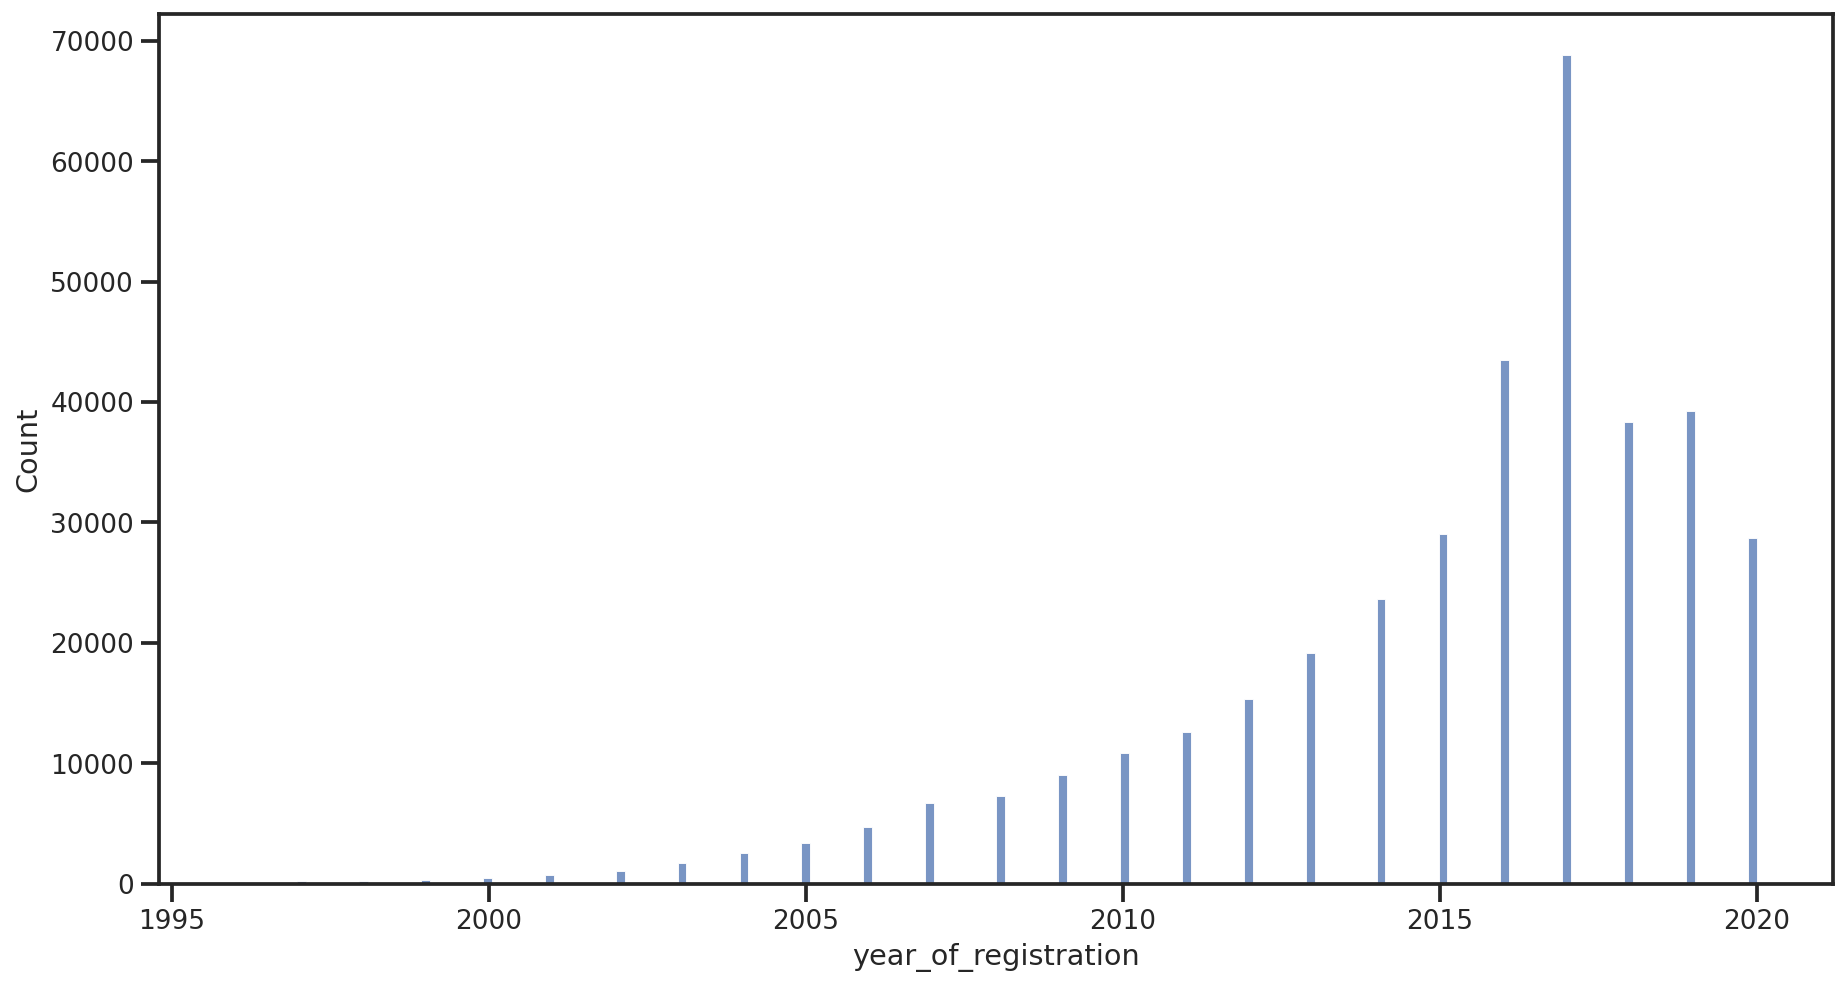

In [7]:
#plotting years of registration that are above 1930
sns.histplot(x=df.loc[df['year_of_registration']>1995,'year_of_registration'].round(0))

The graph above gives a sense of the distribution of the data on year of registration. It can be seen that most of the data is between the year 2005 and 2020. Moreover, New cars, which makes up 8% if the data, will be assigned the year 2021

# 2- Data Processing for Machine Learning



In order to begin the processing of data for Machine learning model, it is a logical practice to split the data into train and test data frames. Splitting data into test and train after the processing may lead to information leak. There is a possibilty that iformation of the training data may leak into the data due to the imputation of missing values. Therefore it is better to split the data frame prior to imputing missing values


In [8]:
# Creating a category 'other' for all the categorical variables. 
cat_var=['body_type','fuel_type','standard_colour']
for x in cat_var:
  counts = df[x].value_counts()
  id = counts[counts.lt(200)].index
  df.loc[df[x].isin(id), x] = 'Others'

In the code above, a new catgeory **others** is being created for each categorical variabel. For a category in a categorical variable, if there are less than 200 observations, than those observation will be put into others. This is important to ensure that the proportion of each category is roughly the same in both the test and train data frames 

In [9]:
df.vehicle_condition.value_counts(normalize=True)

USED    0.922267
NEW     0.077733
Name: vehicle_condition, dtype: float64

In [10]:
# Splitting df into df_test and df_train based on the proportion of vehicle condition
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2,stratify=df['vehicle_condition'],random_state=40)

In [11]:
df_test.vehicle_condition.value_counts(normalize=True)

USED    0.922265
NEW     0.077735
Name: vehicle_condition, dtype: float64

In [12]:
df_train.vehicle_condition.value_counts(normalize=True)

USED    0.922268
NEW     0.077732
Name: vehicle_condition, dtype: float64

In the codes above, the data has been split into test and train data frames. Moreover, the splitting is done based on the proprtion of **vehicle_condition**. It can be seen that the proportion of new and used vehicle stays tha same before and after spitting the data.
In addition, splitting based on vehicle condition will also ensures that the proportions remain the same for all the categories for both the data frames

In [13]:
df_train.describe()

,public_reference,mileage,year_of_registration,price,log10_price
count,3.216040e+05,321510.000000,294981.000000,3.216040e+05,321604.000000
mean,2.020071e+14,37740.053106,2015.016221,1.734879e+04,4.077626
std,1.674909e+10,34846.020583,7.569444,4.733848e+04,0.371854
min,2.013072e+14,0.000000,999.000000,1.200000e+02,2.079181
25%,2.020090e+14,10496.000000,2013.000000,7.495000e+03,3.874772
50%,2.020093e+14,28610.000000,2016.000000,1.260100e+04,4.100405
75%,2.020102e+14,56836.500000,2018.000000,2.000000e+04,4.301030
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06,7.000000


In [14]:
df_test.describe()

,public_reference,mileage,year_of_registration,price,log10_price
count,8.040100e+04,80368.000000,73713.000000,8.040100e+04,80401.000000
mean,2.020070e+14,37757.767532,2014.966125,1.731465e+04,4.076551
std,1.757080e+10,34774.685126,9.372526,4.264372e+04,0.372970
min,2.014120e+14,0.000000,999.000000,2.500000e+02,2.397940
25%,2.020090e+14,10409.000000,2013.000000,7.495000e+03,3.874772
50%,2.020093e+14,28689.500000,2016.000000,1.259900e+04,4.100336
75%,2.020102e+14,57000.000000,2018.000000,1.999700e+04,4.300965
max,2.020110e+14,413079.000000,2020.000000,9.999999e+06,7.000000


When analysing **df_test** and **df_train** the parameters such as range and centerality are the same. 


## 2.1 Dealing with Missing Values, Outliers, and Noise

### Year of Registration and Reg Code

In [15]:
#checking for null values in the year of registration and reg_code
df_train[['year_of_registration','reg_code']].isnull().sum()

year_of_registration    26623
reg_code                25469
dtype: int64

In [16]:
#null values in year_of_registration by used and new cars
df_train.loc[df['year_of_registration'].isnull(),'vehicle_condition'].value_counts(normalize=True)

NEW     0.939
USED    0.061
Name: vehicle_condition, dtype: float64

The various outputs above exhibit that the Year of Registration column has **26623** null values and reg_code has 25469 Null_Values
Furthermore, it can also be seen that **93.8%** of the null values in the year of registration column come from New cars. This makes sense as cars only get registered when they are bought.
The following  codes will impute the missing and null values in the year of registration column using the information from reg_code column


In [17]:
# filling the null values for new car with 0
df_train.loc[(df_train['vehicle_condition']=='NEW'),'year_of_registration']=\
df_train.loc[(df_train['vehicle_condition']=='NEW'),'year_of_registration'].fillna(2021)

#Dropping the observations for which both the reg_code and year of registration are null. 
df_train.drop(df_train.loc[(df_train['year_of_registration'].isnull())&(df_train['reg_code']).isnull()].index,axis=0,inplace=True)

# We can see that no new cars have registraion as null. They have been imputed with 2021
df_train.loc[df_train.year_of_registration.isnull(),'vehicle_condition'].value_counts()


USED    1364
Name: vehicle_condition, dtype: int64

In [18]:
# 1. Making a list of unique reg_code values and removing all the null values from the list
df_train['reg_code']=df_train['reg_code'].str.upper()

reg_code_list=df_train.reg_code.unique().tolist()

reg_code_list = [x for x in reg_code_list if str(x) != 'nan']

In [19]:
# 2. running a loop over the list of unique reg_code to calculate the mode year of registration for a given reg_code
# 3. Than filling the null values in year of registration with the mode values calculated in step 1
for x in range(len(reg_code_list)):
  try:
    df_train.loc[(df_train['reg_code']==reg_code_list[x])&(df_train['year_of_registration'].isnull()),'year_of_registration']=\
    df_train.loc[(df_train['reg_code']==reg_code_list[x])&(df_train['year_of_registration'].isnull()),'year_of_registration'].\
    fillna(float(df_train.loc[df_train['reg_code']==reg_code_list[x],'year_of_registration'].mode()))
  except:
    pass 

# the try and except is included in the loop to ensure the loop doesnt break in case of no mode value

#Dropping the observations for which both the reg_code and year of registration are null. This is the case bec
df_train.drop(df_train.loc[(df_train['year_of_registration'].isnull())&(df_train['reg_code']).isnull()].index,axis=0,inplace=True)

#checking the observation after imputing the null values
len(df_train.loc[df_train['year_of_registration'].isnull(),'year_of_registration'])

7

In [20]:
# Dropping the remaining null Observations
df_train.drop(df_train.loc[df_train['year_of_registration'].isnull()].index,axis=0,inplace=True)

In [21]:
#Dropping observation for year of registration that are below 1930
df_train.drop(df_train.loc[df_train['year_of_registration']<1930, 'year_of_registration'].index,inplace=True)

#checking if there are any year of registration below 1930
print('there are '+str(len(df_train.loc[df_train['year_of_registration']<1930, 'year_of_registration']))+' observation that have year of registration below 1930.')

there are 0 observation that have year of registration below 1930.


The null values in year of registeration for used cars are filled with the years implied by the reg_code column. As an example, null values in the year of registration for which the reg code is **51**, is filled with ***2001**. The process for this type of imputation is given as following:

1. First a list of unique reg_code was made


2. Secondly, the **mode** or the **most occuring** year of registration for every unqiue reg_code was calculated. This mode value would be the implied year of registration for a given reg code. So the mode of reg_code **51** would be **2001**

3. Thirdly, the null values were replaced with the implied year of registration calculated in step two.

All the steps above were done in though a loop

To resolve the issue of null values in year of registration of new cars, they can be replaced with the year **2021**, which is 1 year above the max value of this column i.e. 2020. This makes sense because we want to differentiate the year of registration for new cars from the used cars. Also this will make the post processing simpler.

Lastly,there were 18 extreme observations below the year 1930 that were entered due to typing error. These outliers in the data have been dropped by the code above.


### Body Type and Fuel Type

In [22]:
#checking for Null Values in body_type and fuel_type column
df_train[['body_type','fuel_type']].isnull().sum()

body_type    625
fuel_type    486
dtype: int64

The code above reports on the Null values in each body_type and fuel_type column.

We can impute missing values based on the mode value of body_type for each standard_model and standard_make. This approach should yeild pretty accurate results as it will fill in the missing values based on the true value of **body_type** for a **given standard_model and standard_make**. This is the case because every standard_make and standard_model should have a distinct body type. Imputation using the most frequent body_type for a given standard_make and standard_model is the most logical approach and therefore this approach will be used in this report. 

In [23]:
# A new column make_model is being made by joing the values in standard_make and standard_model
# This will make imputation using the most frequent body_type for a given standard_make and standard_mode much simpler
# for uniformity, the strings in the model_make have been converted to uppercase
df_train['make_model']=df_train['standard_make']+df_train['standard_model']
df_train['make_model']=df_train['make_model'].str.upper()

# making a list of distinct make_model for which body_type is null
make_model_list=df_train.loc[df_train['body_type'].isnull(),'make_model'].unique().tolist()
make_model_list = [x for x in make_model_list if str(x) != 'nan']

In the code above, first a new column is being made which will join the standard_make and standard_model.

Than a list **(make_model_list)** of distinct make_model for which body_type is null is being made. 

In [24]:
for x in make_model_list:
    try:
        df_train.loc[(df_train['make_model']==x)&(df_train['body_type'].isnull()),'body_type']=\
        df_train.loc[(df_train['make_model']==x)&(df_train['body_type'].isnull()),'body_type'].fillna\
        (df_train.loc[df_train['make_model']==x,'body_type'].value_counts().index[0])
    except:
        pass

df_train[['body_type']].isnull().sum()

body_type    30
dtype: int64

The loop above runs over the list **(make_model_list)** and fills each null value in the body_type with the most frequent body_type for a given model and make. A try and except statement is given because some body_types dont have any mode or frequent values for a given make and model. This command fills 93% of the null values. Only 38 out of 623 null values are left. 

In [25]:
# Imputing fuel_type using the same list
for x in make_model_list:
    try:
        df_train.loc[(df_train['make_model']==x)&(df_train['fuel_type'].isnull()),'fuel_type']=\
        df_train.loc[(df_train['make_model']==x)&(df_train['fuel_type'].isnull()),'fuel_type'].fillna\
        (df_train.loc[df_train['make_model']==x,'fuel_type'].value_counts().index[0])
    except:
        pass
    
df_train[['fuel_type']].isnull().sum()

fuel_type    280
dtype: int64

In [26]:
# dropping the null values that couldnt be filled
df_train.drop(df_train[df_train['body_type'].isnull()].index,axis=0,inplace=True)
df_train.drop(df_train[df_train['fuel_type'].isnull()].index,axis=0,inplace=True)
df_train[['body_type','fuel_type']].isnull().sum()

body_type    0
fuel_type    0
dtype: int64

Since there were few observations that couldnt be imputed, we have dropped them and this wont impact our ML models. Now there are no null values in body_type and fuel_type.

### Mileage

In [27]:
#checking null Values
df_train.mileage.isnull().sum()

83

In [28]:
#checking 0s by vehicle condition
df_train.loc[df_train["mileage"]==0].groupby('vehicle_condition')['mileage'].count()

vehicle_condition
NEW     12640
USED      276
Name: mileage, dtype: int64

In [29]:
#checking how many 0s there are in mileage column
df_train.loc[df_train["mileage"]==0,'mileage'].count()

12916

In [30]:
#number of observations by each category and with mileage greater than 0 
df_train.loc[df_train["mileage"]>0].groupby('vehicle_condition')['mileage'].count()

vehicle_condition
NEW      12276
USED    295748
Name: mileage, dtype: int64

Apart from the from the outliers, mileage Column has a total of **83 Null Values and 12916** Zeroes. From the total cars with Zero mileage, **12640 cars are new and 276 are used**. It is counterintuitive to have used cars with no mileage on them. Therefore, they must have been entered by mistake or there was not information available on it. Moreover, **12223** new cars have a mileage of more than Zero and this maybe due to some cars being test Driven. To establish a difference between used and new cars, it would be logical to have mileage equal to 0 for new cars and Mileage greater than 0 for used cars.

The Following codes will solve the highlighted issues


In [31]:
# setting mileage for all the new cars equal to 0
df_train.loc[(df_train['mileage']>0)&(df_train['vehicle_condition']=='NEW'),'mileage']=0
df_train.loc[df_train["mileage"]>0].groupby('vehicle_condition')['mileage'].count()

vehicle_condition
USED    295748
Name: mileage, dtype: int64

In [32]:
#Making a list of year of registration for used cars having 0 mileage 
ls_nm=df_train.loc[(df_train["mileage"]==0)&(df_train["vehicle_condition"]=='USED'),'year_of_registration'].unique().tolist()

# Running over ls_nm to impute 0 mileage for used cars with the year-wise mean for mileage
for c in ls_nm:
    df_train.loc[(df_train["mileage"]==0)&(df_train["vehicle_condition"]=='USED')&(df_train['year_of_registration']==c),'mileage']=\
    df_train.loc[(df_train["mileage"]==0)&(df_train["vehicle_condition"]=='USED')&(df_train['year_of_registration']==c),'mileage'].replace(\
    0, df_train.loc[df_train['year_of_registration']==c,'mileage'].mean())                                                                                                               

# checking if the imputation was successfull
len(df_train.loc[(df_train["mileage"]==0)&(df_train['vehicle_condition']=='USED'), 'mileage'])


0

In [33]:
# 1. making a list of unique year of registration for which the mileage is null
ls_null=df_train.loc[df_train['mileage'].isnull(), 'year_of_registration'].unique().tolist()

# 2. Imputing null values by running a loop over the list in step 1
for x in ls_null:
  df_train.loc[(df_train['mileage'].isnull())&(df_train['year_of_registration']==x),'mileage']=\
  df_train.loc[(df_train['mileage'].isnull())&(df_train['year_of_registration']==x),'mileage'].\
  fillna(df_train.loc[df_train['year_of_registration']==x,'mileage'].mean())

#checking null values
len(df_train[df_train.mileage.isnull()])

0

The issue of a used car with 0 mileage is fixed by replacing it with the average of the mileage in which that used car was registered. As shown above, the data distribution of  mileage for a given year of registration tends to follow a normal distribution. Therefore, there is a higher confidence in the year-wise mean for mileage. The imputation is done through the following steps.

1. Making a list of unique years in the year of registration column


2. Than filling the 0 mileage for used cars by replacing them with the mean mileage of the yeat the car was registered in. This will be done through coding a loop that will run over the list in step one

Secondly, mileage for all the new cars is set to 0. This is the case because having some mileage for a new car doesn't really impact its price. 

Thirdly, the null-values are imputed by the same method used for replacing 0s for used cars.

### Standard Colour

In [34]:
df_train['standard_colour'].isnull().sum()

4283

There are **4283** null vallues for standard colour. Many standard make and model have various options for colours. The imputation of missing values in standard colour is done as such that the current proportion of each standard_colour to the total sum of the standard_colour is maintained. So if black makes up 21.7% of the data, after the imputation, black would still stand at 21.7%

In [35]:
# 1. making a list of unique colours
list_color=df_train['standard_colour'].unique().tolist()
list_color=[x for x in list_color if str(x) != 'nan']

# 2. Making a list proportion of each colour to the total number of observations
prob_color=list(df_train.standard_colour.value_counts(normalize=True).values)

# 3. Imputing null values based on the proportion that each colour makes towards the total observation
df_train['standard_colour'] = df_train['standard_colour'].apply(lambda x: np.random.choice(list_color, 1, replace=False, p=prob_color)[0] if pd.isna(x) else x)

print('There are '+str(df_train.standard_colour.isnull().sum())+' observation with null values in standard colour column')

There are 0 observation with null values in standard colour column


All the steps to impute the missing values in the train data have also been applied to the test data. Kindly check the rough work for the complete code

## 2.2  Feature Engineering, Data Transformations, Feature Selection

### Price

In [37]:
# converting all the prices below 500 to 500 for Train Data
df_train.loc[df_train['price']<500,'price']=500
len(df_train[df_train.price<500])

#converting all the prices below 500 to 500 for Test fata
df_test.loc[df_test['price']<500,'price']=500
len(df_test[df_test.price<500])

0

When Analysing the observation with price less than 500, there are a few **observations**. This is being done to get rid of the extreme values.

In [38]:
# Making new variable log10_mileage by applying log10 to mileage column for df_train
df_train['log10_price']=np.log10(df_train.price)

# Making new variable log10_mileage by applying log10 to mileage column for df_test
df_test['log10_price']=np.log10(df_test.price)



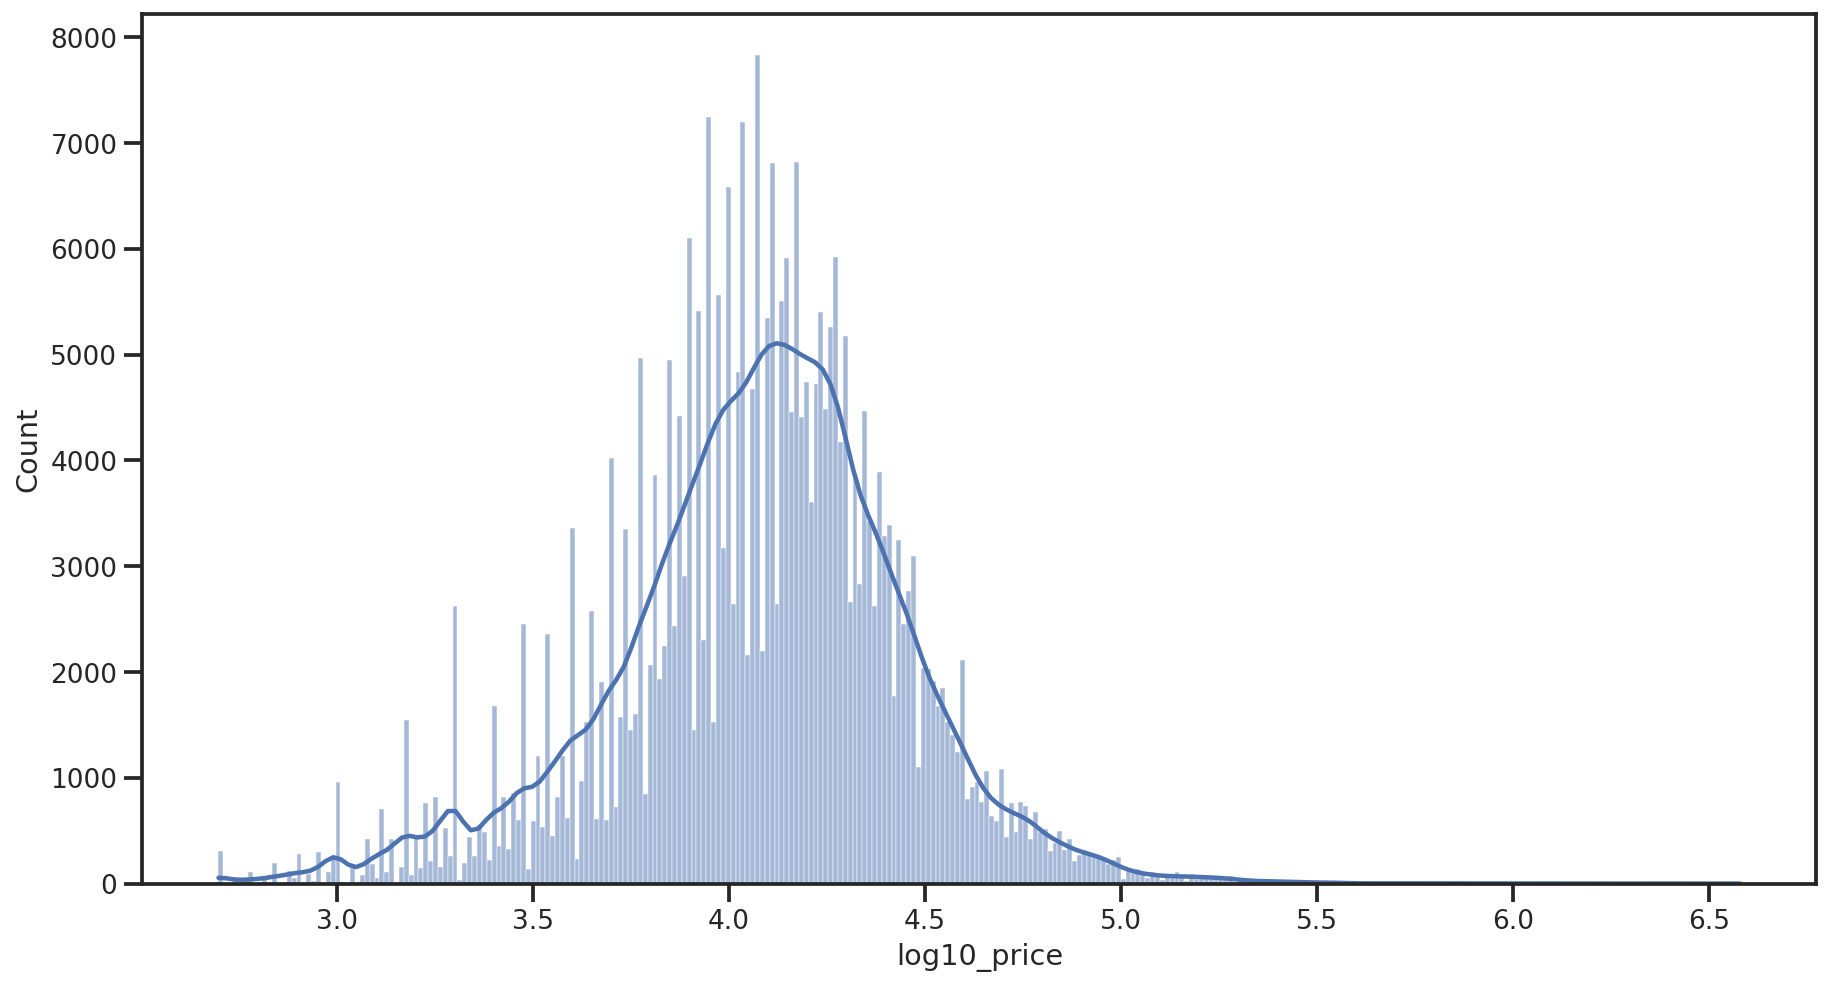

In [39]:
# Plotting log10_price
sns.histplot(df_train.log10_price,kde=True)

A new feature **log10_price** is engineered by taking the log10 of the price column. This is done to obtain a more normal distribution for the price. This can be confirmed by looking at the histplot above. Furthermore, log10_price will enable to test associations between price and other variables. Also the ML model will use this variable to see if the model gets better

In [40]:
# to try differet specifications, the price and mileage will aslo be transformed using the standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_train[['scaled_mileage','scaled_price']]=scaler.fit_transform(df_train[['mileage','price']])
df_train
df_test[['scaled_mileage','scaled_price']]=scaler.fit_transform(df_test[['mileage','price']])



In the code above, price and mileage are scaled using the standard scaler. Standarizing the variables tends to make the model more efficient and yeild good results.

In [41]:
# Dropping Unnecessary Columns
df_train.drop(columns=['reg_code','public_reference','make_model'],inplace=True)

# Dropping Unnecessary Columns for df_test
df_test.drop(columns=['reg_code','public_reference','make_model'],inplace=True)

In [42]:
df_train.isnull().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
log10_price              0
scaled_mileage           0
scaled_price             0
dtype: int64

The code above is dropping all the columns that are deemed as not importat for the ML Model. Since pandas indexing is being used for subsetting, there is no need for public reference. Moreover, reg_code gives the same information as the year of registration, therefore there is no need for it. Lastly, Make_model was used for the purpose of imputation, therefore it is not needed any more.

From the output above, it can be seen that all the missing values have been imputed and all the irrelevant columns have been dropped

### Predictive Power of Different Variables (Pre ML Model)

Subsetting Data for Visualisation

In [43]:
df1=df_train.loc[(df_train['year_of_registration']>=1990)&(df_train['price']>800)&(df_train['price']<200000)&(df_train['mileage']!=10)&(df_train['mileage']!=50)&(df_train['mileage']!=100)].copy()


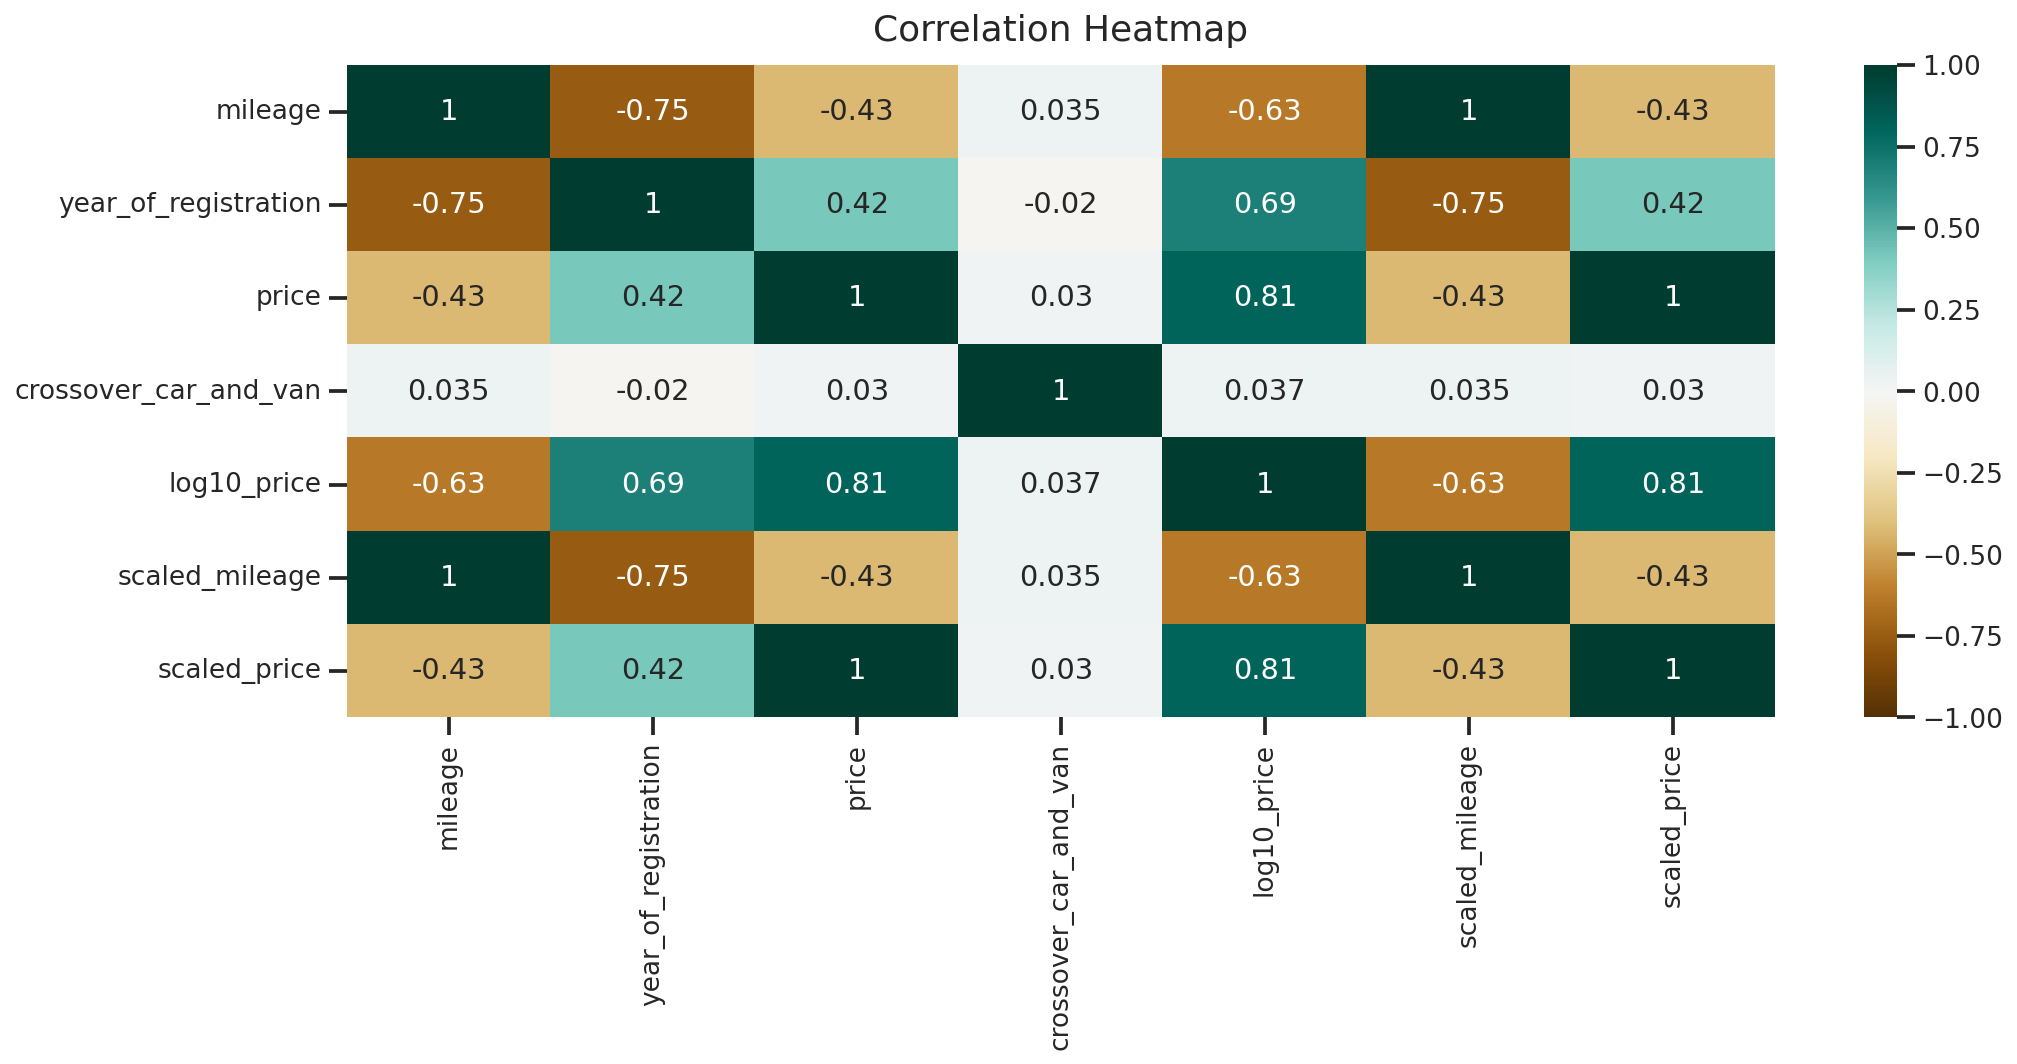

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

When analysing the correlation heatmap, there is a fairly high positive correlation between year of registration and log10_price. This is expected as the cars that were registered in recent years tend to have a higher price as compared to cars that have an older year of registration. The older the car's registration, the higher the mileage and lower the price. 

Another intresting finding is a high negative correlation between year_of_registration and mileage. This is also expected as cars with older years of registration tend to be driven more than the cars that were recently registered. This correlation can be problematic in the case of ML models such as linear regression.

Furthermore, a negative and fairly moderate relationship can be found between mileage and log10_price. This is also anticipated as cars with a higher mileage tend to have more wear and tear. This further impacts the price of the car negatively.

[Text(0.5, 1.0, 'Regplot for Log10_price vs year_of_registration')]

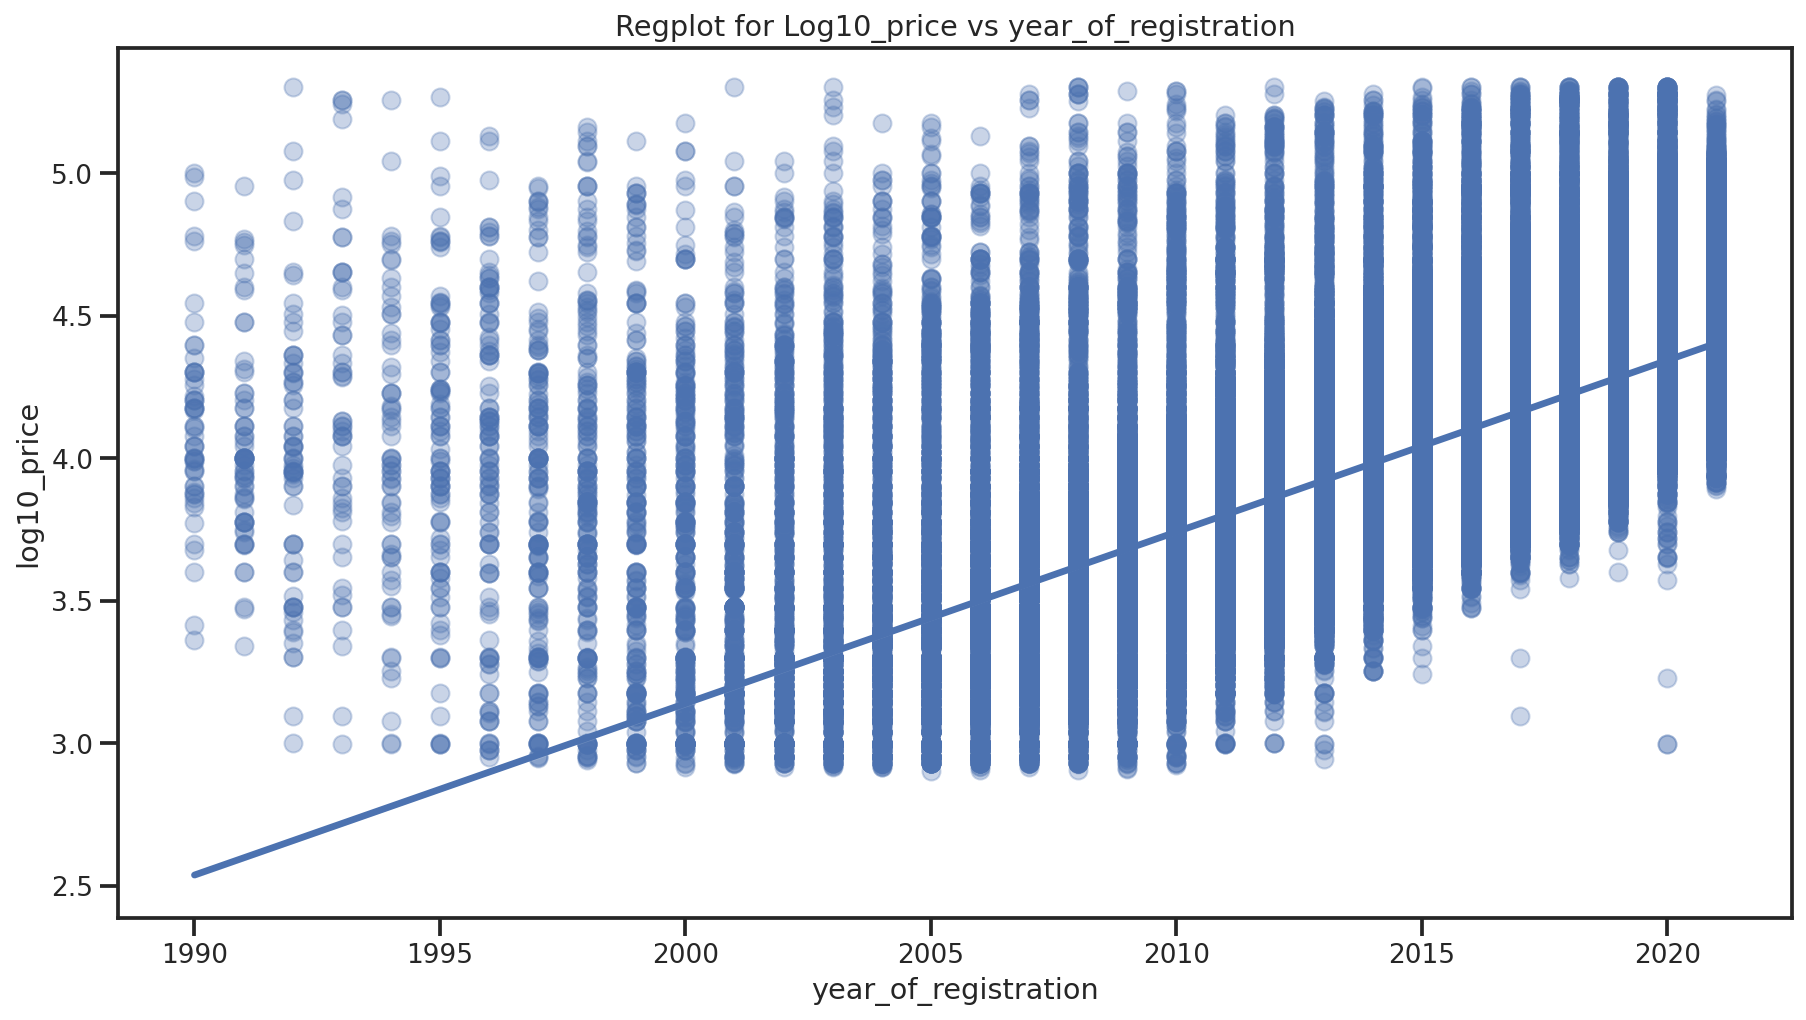

In [45]:
#Plotting a reg plot
sns.regplot(data=df1, x='year_of_registration', y='log10_price', \
            scatter_kws=dict(alpha=0.3)).set(title='Regplot for Log10_price vs year_of_registration')

The graph above is a regplot for year_of_registration vs log10_price. A clear positive relationsip is being protrayed by the graph. Therefore it is year_of_registration is expected to be an essential feature for te purpose of predicting the price of the car. This hypothesis will be checked after developing the machine learning model.

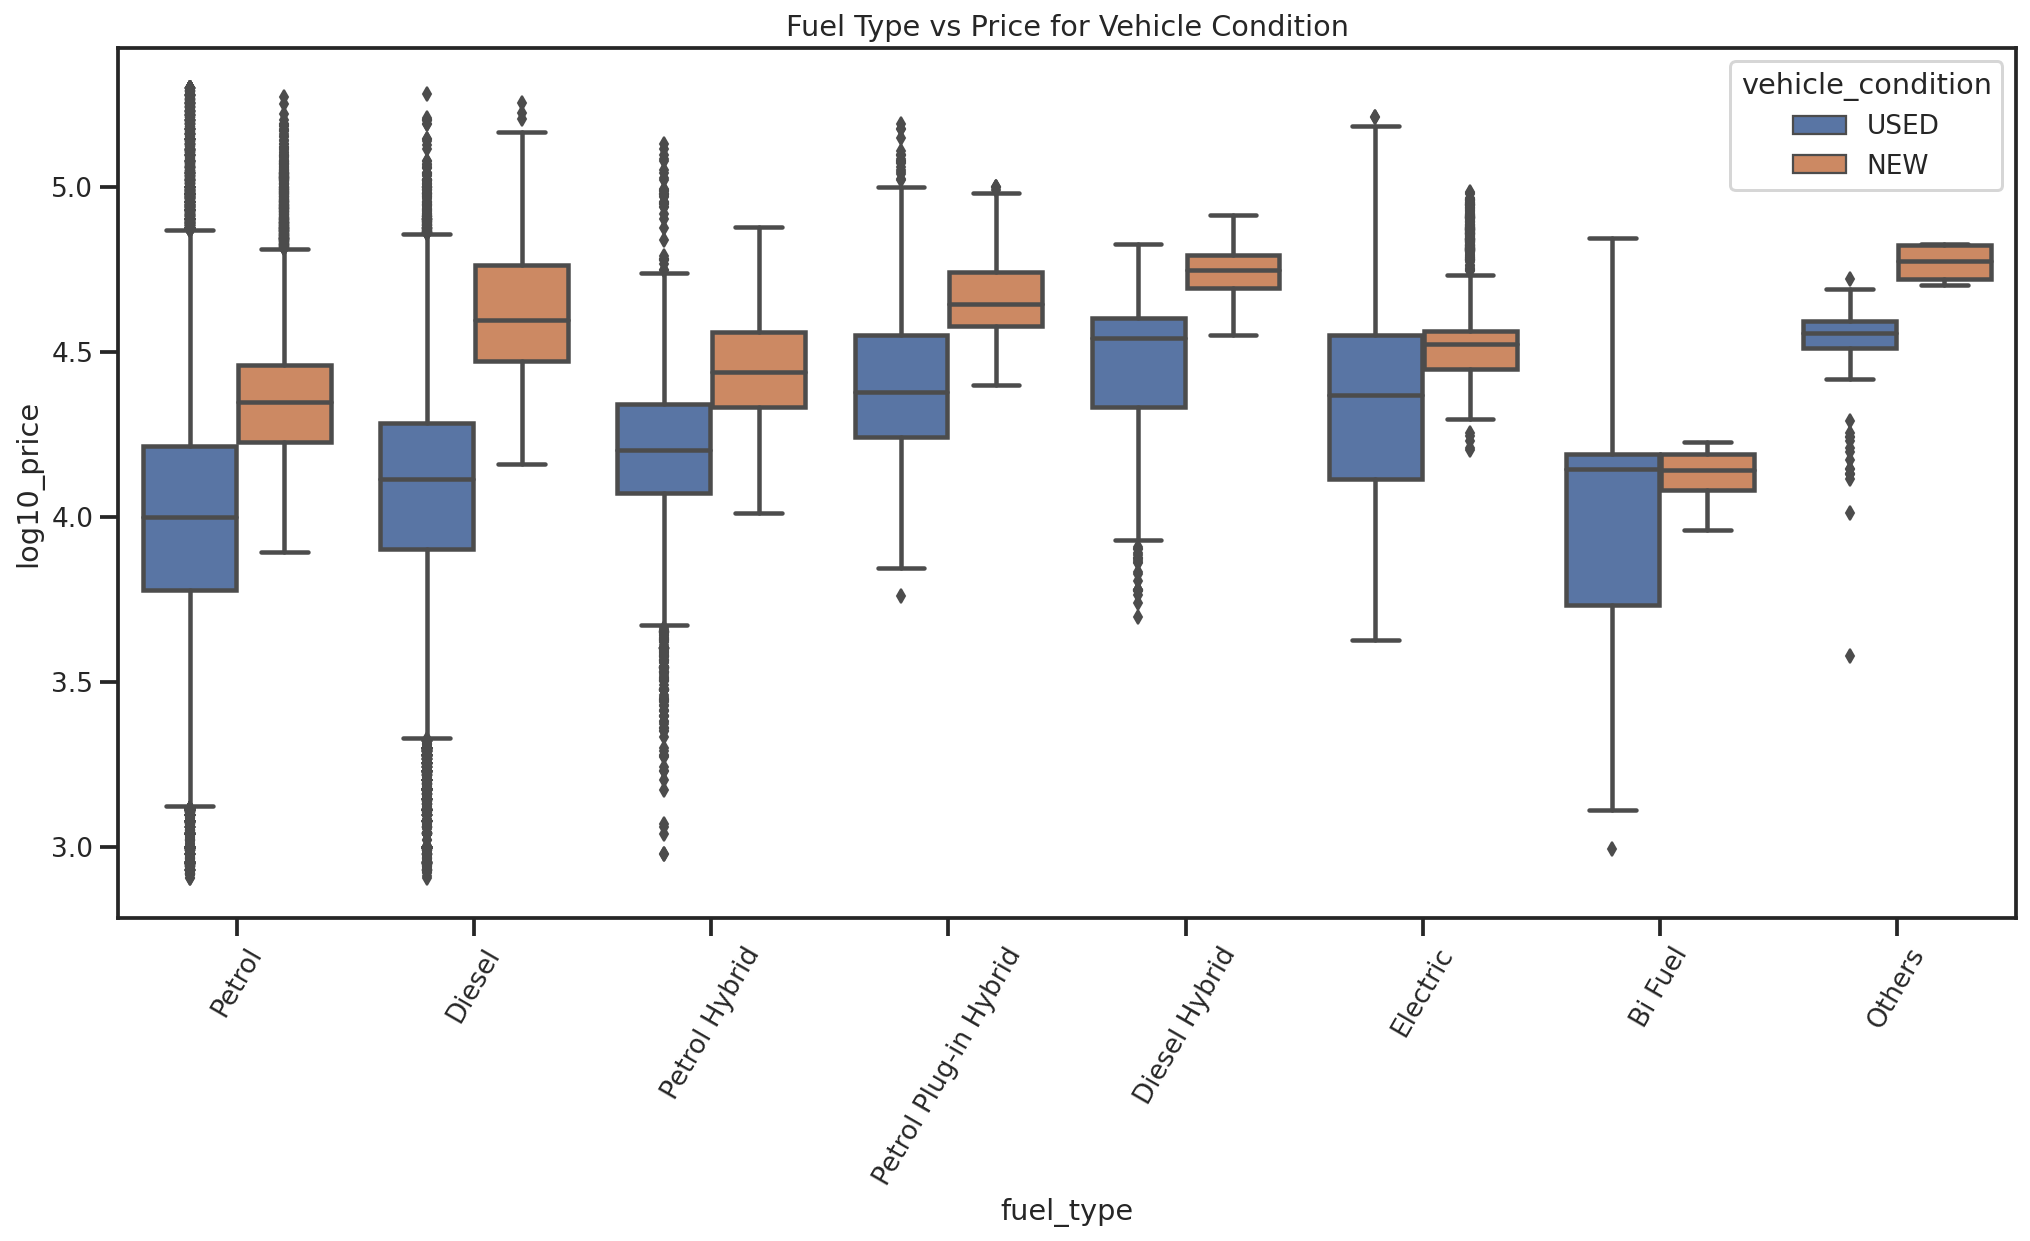

In [46]:
fig,ax=plt.subplots(1,figsize=(17,8))
sns.boxplot(data=df1, x="fuel_type", y="log10_price", hue="vehicle_condition").set(title='Fuel Type vs Price for Vehicle Condition')
plt.xticks(rotation=60)
plt.show()

A significant variation in price based on the fuel_type can be seen in the Box plot above. Cars that are dieasel hybrid, Diesel Plug_in Hybrid and Petrol Plug-in Hybrid tend to have a higher price as compared to other categories. Morover, cars that run on bi fuel are most likely to have lower price as compared to cars that run on other fuel types. Last, price of a new car for a given fuel type is higher with the exception of Bi fuel

### Encoding Categorical Variables


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
!pip install category_encoders
# Importing target incoder
from category_encoders import TargetEncoder

In [48]:
# Importing target incoder
from category_encoders import TargetEncoder
# setting the target encoder equal to enc
enc = TargetEncoder()

# Fitting and transforming using the standard make and log10 Price
encoded_make=enc.fit_transform(df_train['standard_make'],df_train['price'])

# Making a New Data Frame and dropping the standard_model and replacing it 
# with the newly fitted and transformed encoded_make
X_train=df_train.drop(columns='standard_make').join(encoded_make)

# Transforming the standard make in test data
enc_make_test=enc.transform(df_test['standard_make'],df_test['price'])
X_test=df_test.drop(columns='standard_make').join(enc_make_test)

# Similar to the standard make, standard model is also being target encoded 
enc_model=enc.fit_transform(df_train['standard_model'],df_train['price'])

# Dropping standard model and joining new encoded column enc_model
X_train=X_train.drop(columns='standard_model').join(enc_model)

# transfomring standard_make in df_test and making and puting it in the test DF
enc_model_test=enc.transform(df_test['standard_model'],df_test['price'])
X_test=X_test.drop(columns='standard_model').join(enc_model_test)

The Standard make and Standard model are considered to be important features that determine the price of a car. However, there are **1097** unique models and **101** unique standard make in the data frame. Since it is essential to convert the variables into a number form, onehot encoding these variable would create data frame with extremely high demnsions. The curse of dimensiality is a common problem in ML. In order to deal with this problem, these two variables are tagret encoded. In this type of encoding, each unique instance coded with the mean of the target variable. Therefore, standard make and standard model have been target encoded using price as a target.


In the code above, these two features have been target encoded and new data frames have been made i.e. X_test and X_train. To ensure there is no data leakage, the standard make and standard model in the X_test have not been fitted and than trasformed, rather they have only been trasfmored using the encoder made earlier

In [49]:
# One hot encoding other catgeorical variables in our train and test data frames
X_train=pd.get_dummies(X_train, columns=['standard_colour','body_type','fuel_type','vehicle_condition'])

# One hot encoding other catgeorical variables in test data frames
X_test=pd.get_dummies(X_test, columns=['standard_colour','body_type','fuel_type','vehicle_condition'])


In [50]:
X_test.head()

,mileage,year_of_registration,price,crossover_car_and_van,log10_price,scaled_mileage,scaled_price,standard_make,standard_model,standard_colour_Beige,...,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Others,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,vehicle_condition_NEW,vehicle_condition_USED
12446,36400.0,2017.0,8991,False,3.953808,-0.040014,-0.374384,8162.984105,7779.034033,0,...,0,0,0,0,0,1,0,0,0,1
125763,45561.0,2016.0,8695,False,3.939270,0.223458,-0.388053,8162.984105,7835.574508,0,...,0,1,0,0,0,0,0,0,0,1
282903,0.0,2021.0,17700,False,4.247973,-1.086886,0.027780,9128.895561,8588.323226,0,...,0,0,0,0,0,1,0,0,1,0
379276,89732.0,2013.0,8695,False,3.939270,1.493826,-0.388053,13695.231083,17198.728309,0,...,0,1,0,0,0,0,0,0,0,1
77117,1500.0,2020.0,12995,False,4.113776,-1.043746,-0.189488,11638.589893,7287.797311,0,...,0,0,0,0,0,1,0,0,0,1


In [51]:
X_train.head()

,mileage,year_of_registration,price,crossover_car_and_van,log10_price,scaled_mileage,scaled_price,standard_make,standard_model,standard_colour_Beige,...,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Others,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,vehicle_condition_NEW,vehicle_condition_USED
384100,28000.0,2018.0,10979,False,4.040563,-0.280139,-0.238629,13695.231083,12903.072645,0,...,0,0,0,0,0,1,0,0,0,1
55987,63322.0,2011.0,7996,False,3.902873,0.733533,-0.354014,14033.615581,19632.430639,0,...,0,1,0,0,0,0,0,0,0,1
267804,45000.0,2016.0,13990,False,4.145818,0.207728,-0.122160,20355.793372,18302.679929,0,...,0,1,0,0,0,0,0,0,0,1
277340,4000.0,2018.0,19995,False,4.300921,-0.968892,0.110119,12344.260821,11607.797448,0,...,0,0,0,0,0,1,0,0,0,1
109394,0.0,2021.0,20590,False,4.313656,-1.083684,0.133135,15348.615711,16110.488584,0,...,0,0,0,0,0,1,0,0,1,0


**Splitting the target variable from the Data Frames and dropping all the col**

In [52]:
# Dropping target variable from the X_train
X_train=X_train.drop(columns=['price','log10_price','scaled_price','scaled_mileage'])
y_train=df_train['price']

# Dropping target variable from the X_test
X_test=X_test.drop(columns=['price','log10_price','scaled_price','scaled_mileage'])
y_test=df_test['price']


In [53]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((321023, 43), (321023,), (80245, 43), (80245,))

In the codes above, target variable have been dropped from the X_test and X_train data frames. Moreover, new frames y_train and y_test have been formed. It can be seen that after all the processing, the X test and train data sets have 43 columnns. 

# 3- Model Building

In [54]:
# Importing all the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## 3.1 Algorithm Selection

### Decision Tree

In [55]:
# Constructing a basic Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [56]:
# Checking the Score on train and test data
dt.score(X_train,y_train),dt.score(X_test,y_test)


(0.9977277345219293, 0.777670268419828)

In [57]:
#checking the mean absolute error on train and test data 
mean_absolute_error(y_train, dt.predict(X_train)), mean_absolute_error(y_test, dt.predict(X_test))

(226.54415411675402, 2513.4902294184003)

In the codes above, a  basic decision tree model was trained and than fitted to the trained data. Upon check the scores, it can be seen that on train data, the score is 99.8 percent and on test data, it is 80.4%. This indicates that the model is overfitting. What this means is that it is poor at predicted unseen data as compared to the train data. In addition to this, the mean absolute error on train data is 226.5 and 2487.5 on test data. This means, that on average, the price can be 2487.5 above or below the actual price of an instance. 

### Randomn Forest Regressor

In [58]:
# making a basic randomn forest regressor
rfr1 = RandomForestRegressor(random_state=0)
rfr1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [59]:
# Check scores on train and test data
rfr1.score(X_train,y_train),rfr1.score(X_test,y_test)

(0.9799863833414693, 0.8729283590041853)

In [60]:
# checking the mean absolute error and train and test data
mean_absolute_error(y_train, rfr1.predict(X_train)),mean_absolute_error(y_test, rfr1.predict(X_test))

(872.976977272124, 2029.778876275087)

The codes above have constructed a basic randomn forest regressor model. As compared to a decision tree regressor, there is less overfitting happening and mean absolute error is less. Therefore, Randomn forest Regressor will be used for constructing the Machine learning model. Moreover, the parameters of this regressor will be fine tuned to ensure that it performs well on the unseen data.

## 3.2 Grid Search and Model Ranking

In order to find the best setting for the randomn forrest regressor, a randomized cv search will be conducted first. This will help in narrowing down the parameter settings. The advantage of this type of search si that it randomnly tries different configurations instead of running every configuration. Runnding every configuration would ber significantly time consuming. After narrowinf down on the paramter settings, a a Grid Search will be done to establish the best setting for the parameters

Lastly, these searched will be done on a subset of the data to reduce processing times.

### Randomized Search Cv

In [61]:
# Defining various settings for different parameters of a Randomn Forrest Regressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(9, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,17]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In the code above, paramter ranges are defined for each parameter

In [ ]:
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr1, \
                                param_distributions = random_grid, n_iter = 7, \
                                cv = 3, verbose=2, random_state=42, \
                                n_jobs = -1,return_train_score=True)
# Fit the random search model
rfr_random.fit(X_train.iloc[0:10000,0:],y_train.iloc[0:10000])

The randomized search above there has 3 cross-validations or iterations i.e. 3 folds. Also the number of setting that will be tried are 7. In total, the search above will conduct 21 fits.

In [63]:
rfr_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 17,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 41,
 'bootstrap': True}

In [64]:
rs_cv_results=pd.DataFrame(rfr_random.cv_results_)

rs_cv_results[['param_min_samples_split','param_min_samples_leaf',\
               'param_n_estimators',\
               'param_max_depth', 'mean_train_score', \
            'mean_test_score', 'rank_test_score'  ] ]\
            .sort_values('mean_test_score', ascending=False)

,param_min_samples_split,param_min_samples_leaf,param_n_estimators,param_max_depth,mean_train_score,mean_test_score,rank_test_score
4,17,2,288,41,0.764873,0.676199,1
1,5,10,200,13,0.741592,0.674135,2
6,15,6,555,33,0.734119,0.667390,3
5,5,10,555,37,0.693192,0.657086,4
2,17,10,200,41,0.662406,0.649185,5
3,5,8,911,50,0.770636,0.610452,6
0,10,2,200,9,0.852083,0.570080,7


### Grid Search CV

In [65]:
# setting up the ranges for parameters
param_grid={'n_estimators':[200,400],'min_samples_split': [5,17],\
            'min_samples_leaf': [10,2],'max_features': ['auto'],\
            'max_depth': [13,19,41],'bootstrap': [True]}

In [66]:
#constructing a Grid Search CV 
from sklearn.model_selection import GridSearchCV
gd=GridSearchCV(estimator=rfr1,\
                param_grid=param_grid,\
                scoring=['r2','neg_root_mean_squared_error']\
                ,refit='r2', cv=3,verbose=4)

In [ ]:
# Fitting the Grid Search on the data
gd.fit(X_train.iloc[0:10000,0:], y_train.iloc[0:10000])

In [68]:
gd.best_params_ 

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 400}

The codes above has conducted a Grid Search for the best parameters of the randomn forest regressor. The total combination of different parameters is 24, which is iterated 3 times i.e. 3 folds cross validations. In total, the number of different models that are fitted are equal to 72. 

Based on the Grid Search CV, the following parameters generated number ranked model: **{'bootstrap': True,**

 **'max_depth': 19,**

 **'max_features': 'auto',**

 **'min_samples_leaf': 10,**

 **'min_samples_split': 5,**

 **'n_estimators': 400}**.

 Therefore the randomn forest regressor will be tried with these specifications
 



### Randomn Forest with Selected Parameters

In [69]:
# making our randomn forest regressor
rfr = RandomForestRegressor(max_depth=19, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400, random_state=42, bootstrap=True,n_jobs=-1,max_features='auto')

In [70]:
# Fitting the randomn forrest regressor to our training data
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400, random_state=42)

In [71]:
# checking the random forrest scores
rfr.score(X_train,y_train),rfr.score(X_test,y_test)

(0.9062793450799045, 0.8480313528363588)

In [72]:
# checking the mean absolute error train and test data
mean_absolute_error(y_train, rfr.predict(X_train)),mean_absolute_error(y_test, rfr.predict(X_test))

(1718.6659848973447, 2022.1984697165994)

In [73]:
# checking the R Squared
from sklearn.metrics import mean_squared_error,r2_score
y_pred = rfr.predict(X_test)

mse= mean_squared_error(y_test, y_pred,squared=False)

r2=r2_score(y_test, y_pred)

print(f"RMSE: {mse: .2f}")

print(f"R2: {r2: .2f}")

RMSE:  8441.93
R2:  0.85


The codes above have constructed a Randomn forrest regressor based on the paramters suggested by the Randomized and Grid Search Cv. Based on the results, it can be said that the model has improved significantly as compared to the base randomn forrest regressor that was constructed before. In the previous itteration, there was an issue of over fitting with the random forrest regressor. The mean absolute error being reported in the base model for training data was 872 and for test data it was 2024. This was an indication of a model that is over fitting. On the other hand, the mean absolute error for the final model is 1719 for training data and 2021 for test data. This indicated that over model is not over fitting anymore. 

Lastly, the r suqared of 0.85 suggests that 85% of the variation in price is being explained by the model

# 4- Model Evaluation and Analysis

### Feature Importance

In [74]:
# Feature Importance
def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):

    """ """

    if ax is None:

        fig, ax = plt.subplots()

   

    return pd.Series(

        rf.feature_importances_,

        index=feat_names

    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

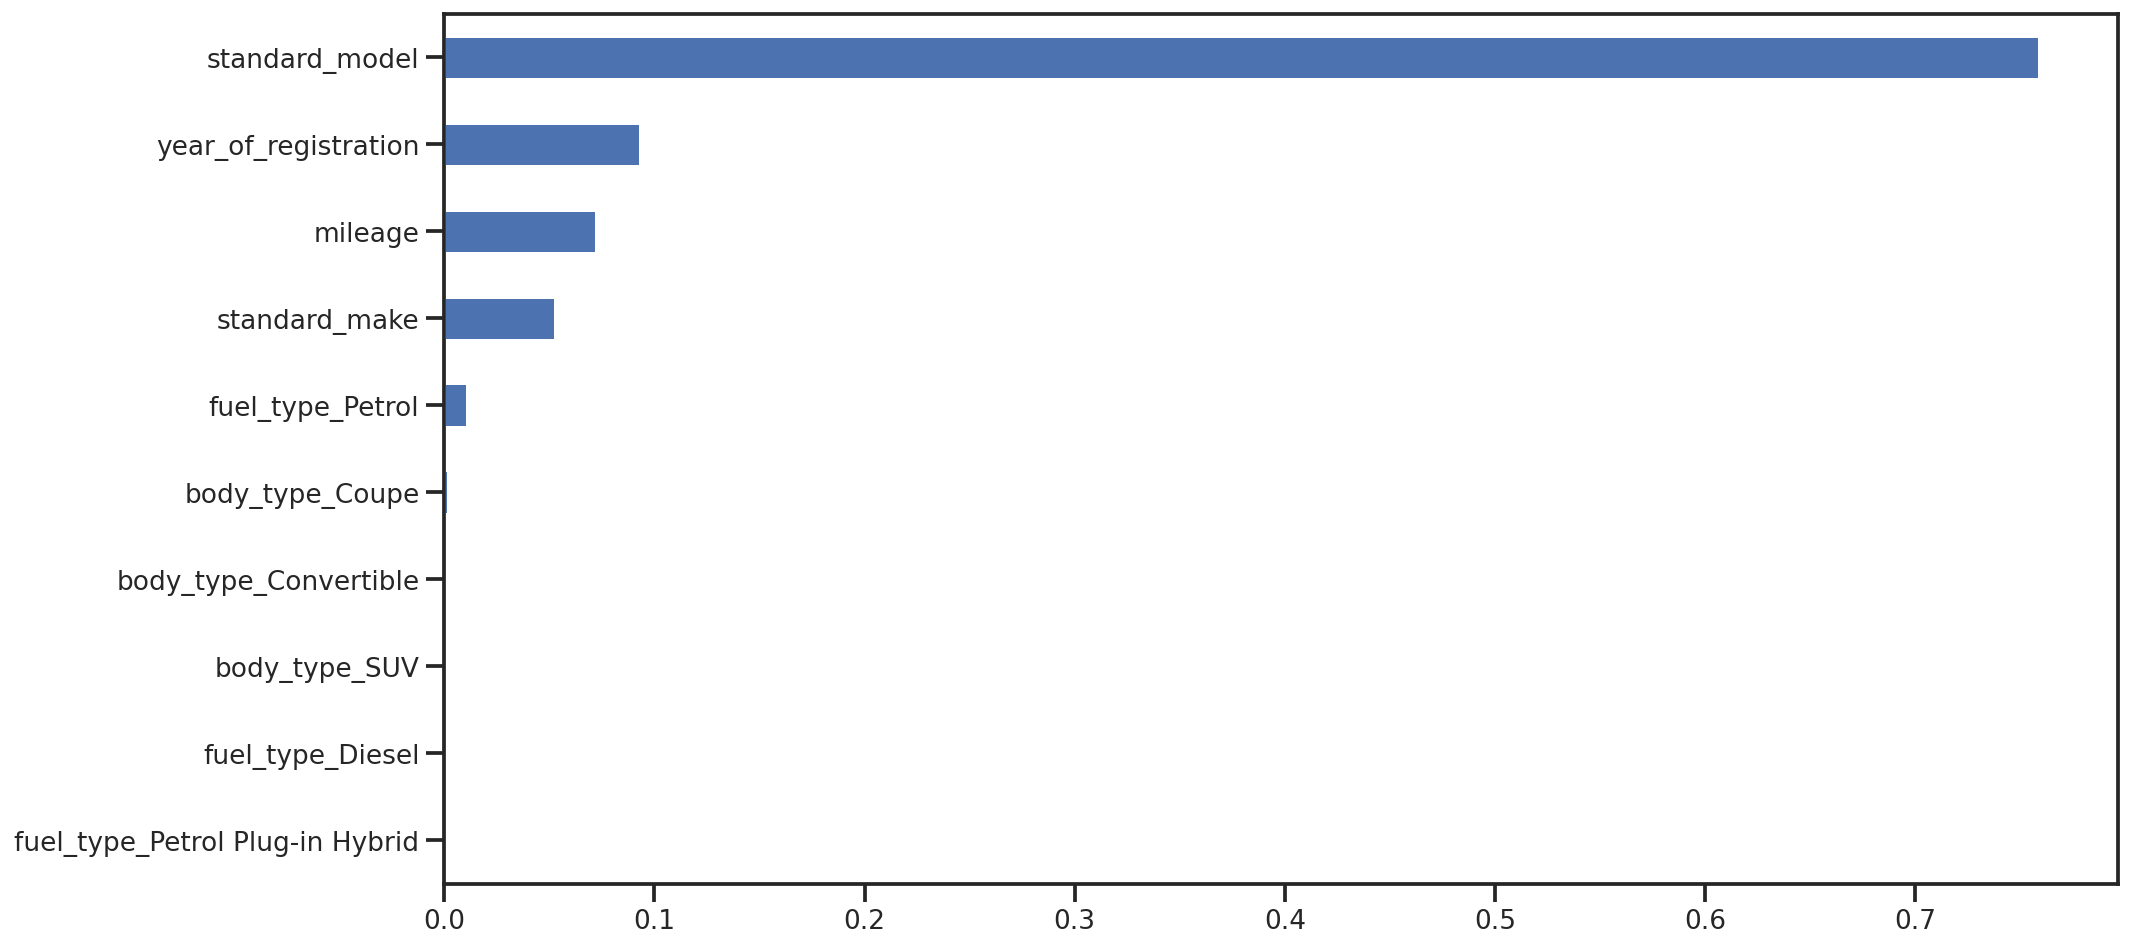

In [75]:
plot_rf_feat_imp_barh(rfr,X_test.columns)

The graph above has been plotted for asses the feature importance, It can be seen that standard_model has a significantly high feautre importance. This makes sense as different companies produce different cars for different price segments. 

Furtheomre, the importance of year of registration and mileage is as expected and discussed earlier in the report. In addition to this, the variation in price based on the fuel type as disscussed earlier can also be confirmed by checking the feature importance in the graph above.

In [76]:
!pip install -q shap
import shap
shap.initjs()

In [77]:
explainer= shap.TreeExplainer(rfr)


In [ ]:
shap_values=explainer.shap_values(X_test.iloc[0:500,0:])
row_idx=1000
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[500],X_test.iloc[500])

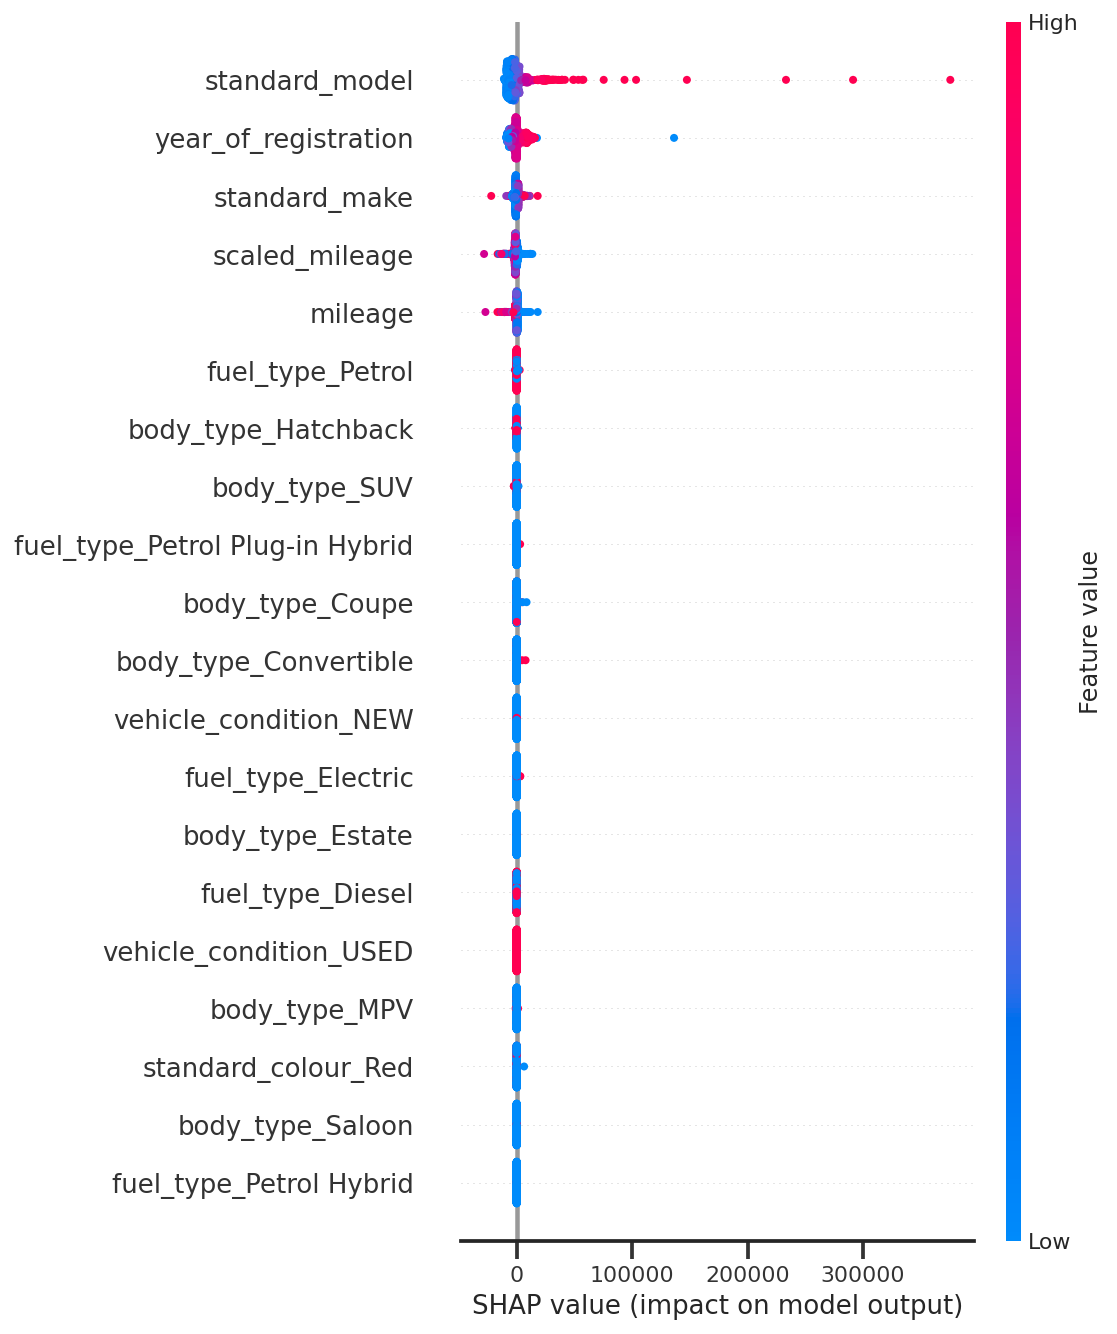

In [ ]:
shap.summary_plot(shap_values,X_test.iloc[0:1000,0:])

The impact of each feature can also be seen in terms of SHAP Values. SHAP values further illustrates the importance of standard model.

In [ ]:
residual = rfr.predict(X) - y
residual = pd.Series(residual).rename('residual')
residual.head()

In [ ]:
residual_abs = residual.abs().rename('residual_abs')
X_test = pd.concat([ X_test, residual, residual_abs ], axis='columns')
X_test.sort_values('residual_abs', ascending=False)

Using the errors generated from the Actual Price minus the Predicted Price can also be used to furhter analyse the performance of the model. For instance, the errors may vary based on group differences. By analysing the errors, it is possible to uncover how well the model works for a particular price segment. Upon mathcing, predicted values with the real values on an instance level, the model performs pretty well. Especially in the case of cars that are price between 1000 to 70000. With very low errors. 